# Анализ базы данных сервиса для чтения книг по подписке

# Цели и задачи исследования 

### Цель:
- Сформулировать ценностное предложение на основании данных

### Задания

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

## Описание проекта 

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-базы-данных-сервиса-для-чтения-книг-по-подписке" data-toc-modified-id="Анализ-базы-данных-сервиса-для-чтения-книг-по-подписке-1">Анализ базы данных сервиса для чтения книг по подписке</a></span></li><li><span><a href="#Цели-и-задачи-исследования" data-toc-modified-id="Цели-и-задачи-исследования-2">Цели и задачи исследования</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Цель:" data-toc-modified-id="Цель:-2.0.1">Цель:</a></span></li><li><span><a href="#Задания" data-toc-modified-id="Задания-2.0.2">Задания</a></span></li></ul></li><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-2.1">Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2.2">Описание данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2.2.1">Описание данных</a></span></li><li><span><a href="#Импорт-бибилиотек" data-toc-modified-id="Импорт-бибилиотек-2.2.2">Импорт бибилиотек</a></span></li></ul></li></ul></li><li><span><a href="#Подключение-к-базе-и-загрузка-данных" data-toc-modified-id="Подключение-к-базе-и-загрузка-данных-3">Подключение к базе и загрузка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Задаем-параметры-подключения" data-toc-modified-id="Задаем-параметры-подключения-3.0.1">Задаем параметры подключения</a></span></li><li><span><a href="#Загружаем-таблицы-из-базы-данных" data-toc-modified-id="Загружаем-таблицы-из-базы-данных-3.0.2">Загружаем таблицы из базы данных</a></span><ul class="toc-item"><li><span><a href="#Наблюдения-по-загрузке-данных" data-toc-modified-id="Наблюдения-по-загрузке-данных-3.0.2.1">Наблюдения по загрузке данных</a></span></li></ul></li><li><span><a href="#Метод-info" data-toc-modified-id="Метод-info-3.0.3">Метод info</a></span></li></ul></li><li><span><a href="#Наблюдения-по-методу-info" data-toc-modified-id="Наблюдения-по-методу-info-3.1">Наблюдения по методу info</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Метод-describe" data-toc-modified-id="Метод-describe-3.1.0.1">Метод describe</a></span></li><li><span><a href="#Наблюдения-по-методу-describe" data-toc-modified-id="Наблюдения-по-методу-describe-3.1.0.2">Наблюдения по методу describe</a></span></li></ul></li><li><span><a href="#Метод-pandas-profiling" data-toc-modified-id="Метод-pandas-profiling-3.1.1">Метод pandas-profiling</a></span><ul class="toc-item"><li><span><a href="#Наблюдения-по-методу-pandas-profiling" data-toc-modified-id="Наблюдения-по-методу-pandas-profiling-3.1.1.1">Наблюдения по методу pandas profiling</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-EDA" data-toc-modified-id="Исследовательский-анализ-данных-EDA-4">Исследовательский анализ данных EDA</a></span><ul class="toc-item"><li><span><a href="#Количество-книг-после-1-января-2000-года" data-toc-modified-id="Количество-книг-после-1-января-2000-года-4.1">Количество книг после 1 января 2000 года</a></span><ul class="toc-item"><li><span><a href="#Наблюдения-по-количеству-книг-после-1-января-2000-года" data-toc-modified-id="Наблюдения-по-количеству-книг-после-1-января-2000-года-4.1.1">Наблюдения по количеству книг после 1 января 2000 года</a></span></li></ul></li><li><span><a href="#Количество-обзоров-и-средняя-оценка-для-каждой-книги" data-toc-modified-id="Количество-обзоров-и-средняя-оценка-для-каждой-книги-4.2">Количество обзоров и средняя оценка для каждой книги</a></span><ul class="toc-item"><li><span><a href="#Наблюдения-по-количеству-обзоров-и-средней-оценке-по-каждой-книге" data-toc-modified-id="Наблюдения-по-количеству-обзоров-и-средней-оценке-по-каждой-книге-4.2.1">Наблюдения по количеству обзоров и средней оценке по каждой книге</a></span></li><li><span><a href="#Издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц" data-toc-modified-id="Издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц-4.2.2">Издательство, которое выпустило наибольшее число книг толще 50 страниц</a></span></li><li><span><a href="#Наблюдения-по-издательству,-которое-выпустило-наибольшее-число-книг-толще-50-страниц" data-toc-modified-id="Наблюдения-по-издательству,-которое-выпустило-наибольшее-число-книг-толще-50-страниц-4.2.3">Наблюдения по издательству, которое выпустило наибольшее число книг толще 50 страниц</a></span></li></ul></li><li><span><a href="#Автор-с-самым-высоким-рейтингом" data-toc-modified-id="Автор-с-самым-высоким-рейтингом-4.3">Автор с самым высоким рейтингом</a></span><ul class="toc-item"><li><span><a href="#Наблюдения-по-автору-с-самым-выскоим-рейтингом" data-toc-modified-id="Наблюдения-по-автору-с-самым-выскоим-рейтингом-4.3.1">Наблюдения по автору с самым выскоим рейтингом</a></span></li></ul></li><li><span><a href="#Среднее-количество-ревью-пользователей-с-количеством-оценок-больше-50" data-toc-modified-id="Среднее-количество-ревью-пользователей-с-количеством-оценок-больше-50-4.4">Среднее количество ревью пользователей с количеством оценок больше 50</a></span><ul class="toc-item"><li><span><a href="#Наблюдения-по-среднему-количеству--пользователей-с-количеством-оценок-больше-50" data-toc-modified-id="Наблюдения-по-среднему-количеству--пользователей-с-количеством-оценок-больше-50-4.4.1">Наблюдения по среднему количеству  пользователей с количеством оценок больше 50</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5">Общий вывод</a></span></li></ul></div>

## Описание данных 

### Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

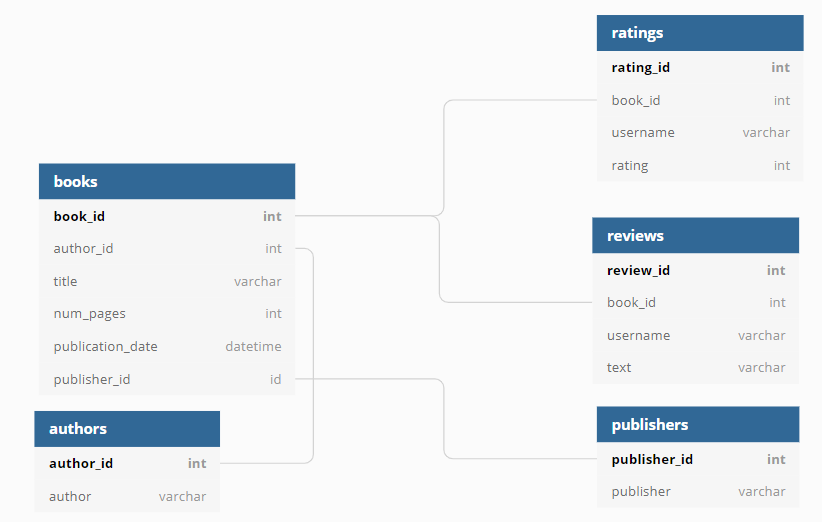

### Импорт бибилиотек

In [1]:
# Для работы с данными
import pandas as pd
from sqlalchemy import create_engine
#!pip install markupsafe==2.1.1
!pip install pandas-profiling
import pandas_profiling

# Для графиков
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 268 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 18.7 MB/s eta 0:00:01
     |████████████████████████████████| 709 kB 54.4 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 81.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 57.4 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 74.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 71.8 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=9b8b2e63d197dfb9fd6ba4056d774b39cd6045ad6624ee20b29e3a04e652e6a2
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


# Подключение к базе и загрузка данных

### Задаем параметры подключения 

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

### Загружаем таблицы из базы данных

In [3]:
# таблица books
query = '''
            SELECT * 
            FROM books;
        '''

books  = pd.io.sql.read_sql(query,
                            con = engine
                           )

# таблица authors
query = '''
            SELECT * 
            FROM authors;
        '''

authors  = pd.io.sql.read_sql(query,
                              con = engine
                             )

# таблица publishers
query = '''
            SELECT * 
            FROM publishers;
        '''

publishers  = pd.io.sql.read_sql(query,
                                 con = engine
                                )

# таблица ratings
query = '''
            SELECT * 
            FROM ratings;
        '''

ratings  = pd.io.sql.read_sql(query, 
                              con = engine
                             )
                              
# таблица reviews
query = '''
            SELECT * 
            FROM reviews;
        '''

reviews  = pd.io.sql.read_sql(query, 
                              con = engine
                             )

#### Наблюдения по загрузке данных

- Данные загружены, можно присутпить к изучению данных

### Метод info

In [4]:
books.info()
print('*'*50)
authors.info()
print('*'*50)
publishers.info()
print('*'*50)
ratings.info()
print('*'*50)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 

## Наблюдения по методу info

**books**
- Пропусков не наблюдаю, тип данных publication_date нужно изменить 

**authors**
- Пропусков не наблюдаю, тип данных соответствует 

**publishers**
- Пропусков не наблюдаю, тип данных соответствует 

**ratings**
- Пропусков не наблюдаю, тип данных соответствует 

**reviews**
- Пропусков не наблюдаю, тип данных соответствует 

#### Метод describe

In [5]:
books.describe()

book_id    author_id   num_pages  publisher_id
count  1000.000000  1000.000000  1000.00000   1000.000000
mean    500.500000   320.417000   389.11100    171.270000
std     288.819436   181.620172   229.39014     99.082685
min       1.000000     1.000000    14.00000      1.000000
25%     250.750000   162.750000   249.00000     83.000000
50%     500.500000   316.500000   352.00000    177.500000
75%     750.250000   481.000000   453.00000    258.000000
max    1000.000000   636.000000  2690.00000    340.000000

In [6]:
authors.describe()

author_id
count  636.000000
mean   318.500000
std    183.741666
min      1.000000
25%    159.750000
50%    318.500000
75%    477.250000
max    636.000000

In [7]:
publishers.describe()

publisher_id
count    340.000000
mean     170.500000
std       98.293777
min        1.000000
25%       85.750000
50%      170.500000
75%      255.250000
max      340.000000

In [8]:
ratings.describe()

rating_id      book_id       rating
count  6456.000000  6456.000000  6456.000000
mean   3228.500000   510.574195     3.928284
std    1863.831001   284.141636     0.943303
min       1.000000     1.000000     1.000000
25%    1614.750000   291.000000     3.000000
50%    3228.500000   506.000000     4.000000
75%    4842.250000   750.000000     5.000000
max    6456.000000  1000.000000     5.000000

In [9]:
reviews.describe()

review_id      book_id
count  2793.000000  2793.000000
mean   1397.000000   504.693161
std     806.413976   288.472931
min       1.000000     1.000000
25%     699.000000   259.000000
50%    1397.000000   505.000000
75%    2095.000000   753.000000
max    2793.000000  1000.000000

#### Наблюдения по методу describe

**books**
- Аномалий не обнаружено

**authors**
- Аномалий не обнаружено

**publishers**
- Аномалий не обнаружено 

**ratings**
- Аномалий не обнаружено

**reviews**
- Аномалий не обнаружено

###  Метод pandas-profiling

In [10]:
pandas_profiling.ProfileReport(books)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
pandas_profiling.ProfileReport(authors)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
pandas_profiling.ProfileReport(publishers)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
pandas_profiling.ProfileReport(ratings)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
pandas_profiling.ProfileReport(reviews)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Наблюдения по методу pandas profiling


**books**
- Аномалий не обнаружено

**authors**
- Аномалий не обнаружено

**publishers**
- Аномалий не обнаружено 

**ratings**
- Аномалий не обнаружено

**reviews**
- Аномалий не обнаружено

# Исследовательский анализ данных EDA

## Количество книг после 1 января 2000 года

In [15]:
# запрос
query = '''
            SELECT COUNT(DISTINCT book_id) 
            FROM books
            WHERE CAST(publication_date AS timestamp) > '2000-01-01'
        '''

books_amount = pd.io.sql.read_sql(query, con = engine)
books_amount

count
0    819

### Наблюдения по количеству книг после 1 января 2000 года

- после 1 января 2000 года вышло 819 книг. Это больше чем 80% от общего количества (всего вышло 1000 книг).

## Количество обзоров и средняя оценка для каждой книги

In [16]:
# запрос
query = '''
            SELECT b.book_id,
                   COUNT(DISTINCT rw.review_id) AS reviews,
                   AVG(r.rating) AS avg_rating
            FROM books AS b
            LEFT OUTER JOIN ratings AS r ON b.book_id = r.book_id
            LEFT OUTER JOIN reviews AS rw ON b.book_id = rw.book_id  
            GROUP BY b.book_id;
        '''

rewiews_avg_rating = pd.io.sql.read_sql(query, con = engine)
rewiews_avg_rating

book_id  reviews  avg_rating
0          1        2    3.666667
1          2        1    2.500000
2          3        3    4.666667
3          4        2    4.500000
4          5        4    4.000000
..       ...      ...         ...
995      996        3    3.666667
996      997        3    3.400000
997      998        4    3.200000
998      999        2    4.500000
999     1000        4    3.833333

[1000 rows x 3 columns]

In [17]:
rewiews_avg_rating.describe()[['avg_rating', 'reviews']]

avg_rating      reviews
count  1000.000000  1000.000000
mean      3.898973     2.793000
std       0.562376     1.074852
min       1.500000     0.000000
25%       3.500000     2.000000
50%       4.000000     3.000000
75%       4.333333     3.000000
max       5.000000     7.000000

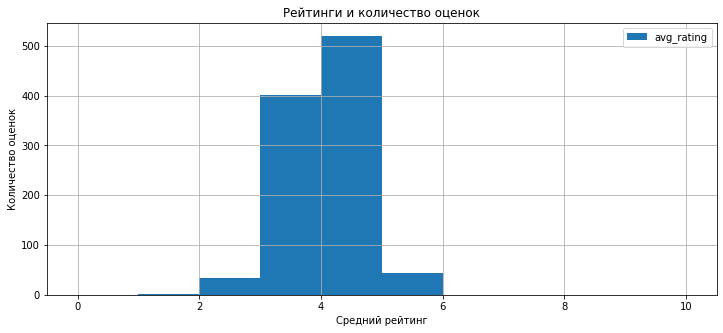

In [18]:
df_budget_ratings = rewiews_avg_rating.loc[
    rewiews_avg_rating.loc[:, 'avg_rating'] > 0]
df_budget_ratings.plot.hist(
                                     y='avg_rating',
                                     grid=True,
                                     title='Рейтинги и количество оценок',
                                     bins=10,
                                     range=(0, 10),
                                     figsize=(12, 5)
)
plt.xlabel('Средний рейтинг')
plt.ylabel('Количество оценок')
plt.show()

### Наблюдения по количеству обзоров и средней оценке по каждой книге

- Чаще всего пользователи ставят книгам рейтинги 3 и 4

### Издательство, которое выпустило наибольшее число книг толще 50 страниц

In [19]:
# запрос
query = '''
            SELECT p.publisher,
                   COUNT(b.book_id) AS books_amount                   
            FROM (SELECT book_id,
                         publisher_id
                  FROM books
                  WHERE num_pages > 50) AS b
            LEFT OUTER JOIN publishers AS p ON b.publisher_id = p.publisher_id            
            GROUP BY p.publisher
            ORDER BY books_amount DESC
            LIMIT 1;
        '''

publisher_top_books_amount = pd.io.sql.read_sql(query, con = engine)
publisher_top_books_amount

publisher  books_amount
0  Penguin Books            42

### Наблюдения по издательству, которое выпустило наибольшее число книг толще 50 страниц

- Penguin Books выпустили 42 полноценные книги (больше всех)



- Об издательсве: 
     - Penguin Books — британское издательство, основанное в 1935 году в Лондоне сэром Алленом Лейном и его братьями Ричардом и Джоном. Главной заслугой издательства считают демократизацию книжного рынка, превратившую книгу из предмета роскоши в удовольствие, доступное массам. 
     
     
- Ссылка на оф сайт (https://www.penguin.co.uk/)

## Автор с самым высоким рейтингом

In [20]:
# запрос
query = '''
            SELECT a.author,
                   AVG(r.rating) AS avg_rating                  
            FROM (SELECT book_id,
                         rating 
                         FROM ratings
                         WHERE book_id IN (SELECT book_id
                                                  FROM ratings
                                                  GROUP BY book_id
                                                  HAVING COUNT(rating_id) > 50)
                  ) AS r 
            LEFT OUTER JOIN books AS b ON b.book_id = r.book_id
            LEFT OUTER JOIN authors AS a ON b.author_id = a.author_id
            GROUP BY a.author
            ORDER BY avg_rating DESC
            LIMIT 1;
        '''

author_top_rating = pd.io.sql.read_sql(query, con = engine)
author_top_rating

author  avg_rating
0  J.K. Rowling/Mary GrandPré    4.287097

### Наблюдения по автору с самым выскоим рейтингом

- Самый высокий рейтинг у писательницы J.K. Rowling и ее коллеги илюстратора Mary GrandPré. Они подарили миру серию книг о волшебнике Гарри Поттере. 



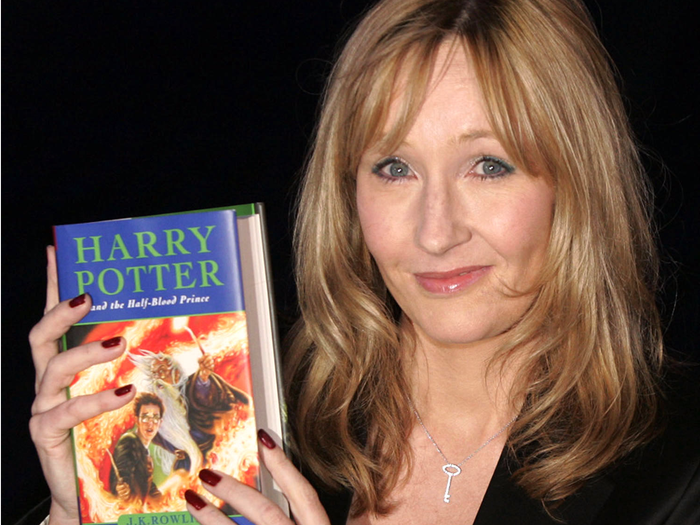

## Среднее количество ревью пользователей с количеством оценок больше 50

In [21]:
# запрос
query = '''
            SELECT AVG(r.review_amount) AS avg_review                  
            FROM (SELECT username,
                         COUNT(review_id) AS review_amount
                  FROM reviews
                  WHERE username IN (SELECT username
                                     FROM ratings 
                                     GROUP BY username
                                     HAVING COUNT(rating) > 50)
                  GROUP BY username) AS r;            
        '''

avg_reviews = pd.io.sql.read_sql(query, con = engine)
avg_reviews

avg_review
0   24.333333

### Наблюдения по среднему количеству  пользователей с количеством оценок больше 50

- В среднем пользователи описаной группы составляют 24 ревью на книги 

# Общий вывод

- Большинство книг, опубликованных в сервисе, выпущены за последние 22 года.


- Чаще всего пользователи ставят книгам рейтинги 3 и 4


- Penguin Books - самое активное издательство (42 книги)


- J.K. Rowling самая высоко-оцененная писательница
